In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../../Isolation Forest/OrdinalDrop2.csv')
ordinal.shape

(2578, 81)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2578, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)

### n_jobs @ 2, 1, None makes no impact on stacking_regressor.score

In [6]:
stacking_regressor1 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, n_jobs=2,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [7]:
stacking_regressor1.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff2390d7fd0>,
                  n_jobs=2, passthrough=True)

In [8]:
stacking_regressor1.score(X,y)

0.9897987806956996

In [9]:
stacking_regressor2 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, n_jobs=1,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [10]:
stacking_regressor2.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff2390d7fd0>,
                  n_jobs=1, passthrough=True)

In [11]:
stacking_regressor2.score(X,y)

0.9897987806956996

In [12]:
stacking_regressor3 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [13]:
stacking_regressor3.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff2390d7fd0>,
                  passthrough=True)

In [14]:
stacking_regressor3.score(X,y)

0.9897987806956996

### cv=5, cv=5, or None has no impact on stacking_regressor.score

In [15]:
stacking_regressor4 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                        cv=5,
                                        passthrough=True)

In [16]:
stacking_regressor4.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff2390d7fd0>,
                  passthrough=True)

In [17]:
stacking_regressor4.score(X,y)

0.98985946096185

In [18]:
stacking_regressor5 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                        cv=5,
                                        passthrough=True)

In [19]:
stacking_regressor5.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff2390d7fd0>,
                  passthrough=True)

In [20]:
stacking_regressor5.score(X,y)

0.98985946096185

In [21]:
stacking_regressor6 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, passthrough=True)

In [22]:
stacking_regressor6.fit(X,y)

StackingRegressor(estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff2390d7fd0>,
                  passthrough=True)

In [23]:
stacking_regressor6.score(X,y)

0.98985946096185

### scores1, scores2, scores3 --> produce same results (same StackingRegressor + same cv)

### scores4, scores5, scores5 --> produce same results (same StackingRegressor w/default cv for train, same cv for test)

In [24]:
scores1 = cross_validate(stacking_regressor1, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [25]:
scores1

{'fit_time': array([4.05671   , 4.05002522, 4.03341889, 4.03562808, 4.05592012]),
 'score_time': array([0.00349689, 0.00338674, 0.00349808, 0.00337505, 0.00339365]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff25b5796d0>,
                    n_jobs=2, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff25b55d5e0>,
                    n_jobs=2, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                     

In [26]:
scores2 = cross_validate(stacking_regressor2, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [27]:
scores2

{'fit_time': array([5.09314108, 5.1043179 , 5.09757471, 5.08308601, 5.09151316]),
 'score_time': array([0.00335789, 0.00340295, 0.00476742, 0.00329709, 0.00331378]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff25b55d2b0>,
                    n_jobs=1, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff25b5793a0>,
                    n_jobs=1, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                     

In [28]:
scores3 = cross_validate(stacking_regressor3, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [29]:
scores3

{'fit_time': array([5.08948493, 5.0771122 , 5.10289788, 5.07547998, 5.08555198]),
 'score_time': array([0.00336599, 0.00337481, 0.00352693, 0.00328517, 0.0034461 ]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff25b72c4f0>,
                    passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff25b72c4c0>,
                    passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 Gradient

In [30]:
scores4 = cross_validate(stacking_regressor4, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [31]:
scores4

{'fit_time': array([5.07723808, 5.05968904, 5.05862498, 5.07955909, 5.10092282]),
 'score_time': array([0.00479579, 0.00336909, 0.00484991, 0.00329685, 0.00336409]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff268395b80>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff268395be0>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff268395ee0>,
                    passth

In [32]:
scores5 = cross_validate(stacking_regressor5, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [33]:
scores5

{'fit_time': array([5.10583401, 5.08432412, 5.06992579, 5.07824993, 5.08355927]),
 'score_time': array([0.00493073, 0.00340509, 0.00340605, 0.00479484, 0.00337481]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff2201fc790>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff2201fcca0>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff22022b430>,
                    passth

In [34]:
scores6 = cross_validate(stacking_regressor6, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [35]:
scores6

{'fit_time': array([5.06859684, 5.06757498, 5.08863592, 5.10685587, 5.09868622]),
 'score_time': array([0.00342298, 0.00338674, 0.00339508, 0.00329518, 0.003371  ]),
 'estimator': [StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff25b74d9a0>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff25b74d760>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7ff25b74dd30>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                          

In [36]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [37]:
cat = evaluate_model(cb, X, y)

In [38]:
cat

,fit_time,score_time,test_score
0,6.417775,0.016094,0.930887
1,6.061006,0.008412,0.944960
2,6.033614,0.012042,0.951659
3,5.931920,0.007838,0.920369
4,6.149135,0.014191,0.946070
5,6.123726,0.009595,0.936118
6,6.180994,0.007332,0.943526
7,5.893674,0.012375,0.933982
8,5.566711,0.007518,0.943425
9,5.685608,0.004010,0.942207


In [39]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [40]:
cat

,cat_score
0,0.930887
1,0.944960
2,0.951659
3,0.920369
4,0.946070
5,0.936118
6,0.943526
7,0.933982
8,0.943425
9,0.942207


In [41]:
g = evaluate_model(gb, X, y)

In [42]:
g

,fit_time,score_time,test_score
0,1.102409,0.004102,0.918969
1,1.063670,0.002436,0.920905
2,1.053822,0.006940,0.935142
3,1.073406,0.002375,0.902607
4,1.063714,0.002407,0.935049
5,1.063845,0.005237,0.915168
6,1.091640,0.002262,0.931671
7,1.044020,0.002366,0.923249
8,0.896653,0.002189,0.943156
9,0.890861,0.002253,0.921449


In [43]:
g = g[['test_score']].rename(columns={'test_score':'gb_score'})

In [44]:
g

,gb_score
0,0.918969
1,0.920905
2,0.935142
3,0.902607
4,0.935049
5,0.915168
6,0.931671
7,0.923249
8,0.943156
9,0.921449


In [45]:
df1 = evaluate_model(stacking_regressor1, X, y)

In [46]:
df1

,fit_time,score_time,test_score
0,12.856710,0.006277,0.932103
1,10.778571,0.008777,0.938355
2,12.206344,0.010468,0.946422
3,10.917756,0.008730,0.920212
4,12.078320,0.008997,0.945375
5,12.451604,0.009736,0.931711
6,10.630841,0.005945,0.941642
7,10.676696,0.009002,0.936305
8,11.607068,0.004197,0.947594
9,11.446668,0.004872,0.941090


In [47]:
df1 = df1[['test_score']].rename(columns={'test_score':'test_score_1'})

In [48]:
df1

,test_score_1
0,0.932103
1,0.938355
2,0.946422
3,0.920212
4,0.945375
5,0.931711
6,0.941642
7,0.936305
8,0.947594
9,0.941090


In [49]:
df2 = evaluate_model(stacking_regressor2, X, y)

In [50]:
df2

,fit_time,score_time,test_score
0,12.771141,0.010212,0.932103
1,11.585053,0.004655,0.938355
2,12.789488,0.009190,0.946422
3,10.997302,0.005739,0.920212
4,12.854029,0.011123,0.945375
5,10.906028,0.006306,0.931711
6,12.739798,0.011806,0.941642
7,12.794189,0.007730,0.936305
8,10.223975,0.006547,0.947594
9,10.181551,0.005073,0.941090


In [51]:
df2 = df2[['test_score']].rename(columns={'test_score':'test_score_2'})

In [52]:
df2

,test_score_2
0,0.932103
1,0.938355
2,0.946422
3,0.920212
4,0.945375
5,0.931711
6,0.941642
7,0.936305
8,0.947594
9,0.941090


In [53]:
df3 = evaluate_model(stacking_regressor3, X, y)

In [54]:
df3

,fit_time,score_time,test_score
0,11.341203,0.008664,0.932103
1,11.312238,0.008369,0.938355
2,11.547977,0.008887,0.946422
3,11.144028,0.011744,0.920212
4,11.361527,0.008260,0.945375
5,11.351328,0.008660,0.931711
6,11.239239,0.009693,0.941642
7,11.823579,0.010842,0.936305
8,10.098787,0.008812,0.947594
9,10.734990,0.005035,0.941090


In [55]:
df3 = df3[['test_score']].rename(columns={'test_score':'test_score_3'})

In [56]:
df3

,test_score_3
0,0.932103
1,0.938355
2,0.946422
3,0.920212
4,0.945375
5,0.931711
6,0.941642
7,0.936305
8,0.947594
9,0.941090


In [57]:
df4 = evaluate_model(stacking_regressor4, X, y)

In [58]:
df4

,fit_time,score_time,test_score
0,11.386017,0.006524,0.932029
1,10.967635,0.010776,0.937765
2,10.877582,0.007128,0.949567
3,10.799328,0.011112,0.919948
4,11.123652,0.009896,0.947418
5,11.025753,0.011011,0.930383
6,14.031401,0.010900,0.942851
7,11.042879,0.011461,0.940193
8,12.306418,0.003391,0.943384
9,11.932360,0.006695,0.939451


In [59]:
df4 = df4[['test_score']].rename(columns={'test_score':'test_score_4'})

In [60]:
df4

,test_score_4
0,0.932029
1,0.937765
2,0.949567
3,0.919948
4,0.947418
5,0.930383
6,0.942851
7,0.940193
8,0.943384
9,0.939451


In [61]:
df5 = evaluate_model(stacking_regressor5, X, y)

In [62]:
df5

,fit_time,score_time,test_score
0,11.294536,0.014592,0.932029
1,11.343489,0.010419,0.937765
2,11.603011,0.007687,0.949567
3,11.166664,0.016930,0.919948
4,11.425151,0.010230,0.947418
5,12.472215,0.012960,0.930383
6,11.879268,0.007468,0.942851
7,11.226383,0.009276,0.940193
8,12.192575,0.003994,0.943384
9,12.126177,0.004078,0.939451


In [63]:
df5 = df5[['test_score']].rename(columns={'test_score':'test_score_5'})

In [64]:
df5

,test_score_5
0,0.932029
1,0.937765
2,0.949567
3,0.919948
4,0.947418
5,0.930383
6,0.942851
7,0.940193
8,0.943384
9,0.939451


In [65]:
df6 = evaluate_model(stacking_regressor6, X, y)

In [66]:
df6

,fit_time,score_time,test_score
0,11.293961,0.011782,0.932029
1,11.544709,0.007290,0.937765
2,11.550303,0.010861,0.949567
3,11.414011,0.009470,0.919948
4,11.582140,0.008224,0.947418
5,11.479253,0.011587,0.930383
6,11.424252,0.011800,0.942851
7,12.256541,0.006463,0.940193
8,10.873547,0.005196,0.943384
9,9.855001,0.007627,0.939451


In [67]:
df6 = df6[['test_score']].rename(columns={'test_score':'test_score_6'})

In [68]:
df6

,test_score_6
0,0.932029
1,0.937765
2,0.949567
3,0.919948
4,0.947418
5,0.930383
6,0.942851
7,0.940193
8,0.943384
9,0.939451


In [69]:
combo = pd.concat([cat, g, df1, df2, df3, df4, df5, df6], axis=1)

In [70]:
combo

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
0,0.930887,0.918969,0.932103,0.932103,0.932103,0.932029,0.932029,0.932029
1,0.944960,0.920905,0.938355,0.938355,0.938355,0.937765,0.937765,0.937765
2,0.951659,0.935142,0.946422,0.946422,0.946422,0.949567,0.949567,0.949567
3,0.920369,0.902607,0.920212,0.920212,0.920212,0.919948,0.919948,0.919948
4,0.946070,0.935049,0.945375,0.945375,0.945375,0.947418,0.947418,0.947418
5,0.936118,0.915168,0.931711,0.931711,0.931711,0.930383,0.930383,0.930383
6,0.943526,0.931671,0.941642,0.941642,0.941642,0.942851,0.942851,0.942851
7,0.933982,0.923249,0.936305,0.936305,0.936305,0.940193,0.940193,0.940193
8,0.943425,0.943156,0.947594,0.947594,0.947594,0.943384,0.943384,0.943384
9,0.942207,0.921449,0.941090,0.941090,0.941090,0.939451,0.939451,0.939451


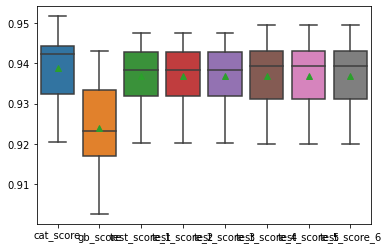

In [71]:
sns.boxplot(data=combo, showmeans=True);

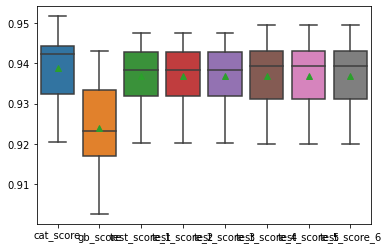

In [72]:
sns.boxplot(data=combo, showmeans=True);

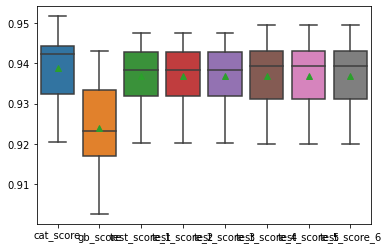

In [73]:
sns.boxplot(data=combo, showmeans=True);

In [74]:
combo.describe()

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.938917,0.923834,0.936844,0.936844,0.936844,0.936834,0.936834,0.936834
std,0.008475,0.011663,0.008412,0.008412,0.008412,0.009084,0.009084,0.009084
min,0.920369,0.902607,0.920212,0.920212,0.920212,0.919948,0.919948,0.919948
25%,0.932435,0.917068,0.931907,0.931907,0.931907,0.931206,0.931206,0.931206
50%,0.942207,0.923249,0.938355,0.938355,0.938355,0.939451,0.939451,0.939451
75%,0.944243,0.933360,0.942730,0.942730,0.942730,0.943117,0.943117,0.943117
max,0.951659,0.943156,0.947594,0.947594,0.947594,0.949567,0.949567,0.949567


In [75]:
combo.describe()

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.938917,0.923834,0.936844,0.936844,0.936844,0.936834,0.936834,0.936834
std,0.008475,0.011663,0.008412,0.008412,0.008412,0.009084,0.009084,0.009084
min,0.920369,0.902607,0.920212,0.920212,0.920212,0.919948,0.919948,0.919948
25%,0.932435,0.917068,0.931907,0.931907,0.931907,0.931206,0.931206,0.931206
50%,0.942207,0.923249,0.938355,0.938355,0.938355,0.939451,0.939451,0.939451
75%,0.944243,0.933360,0.942730,0.942730,0.942730,0.943117,0.943117,0.943117
max,0.951659,0.943156,0.947594,0.947594,0.947594,0.949567,0.949567,0.949567
